# Machine Learning as a Service

This is a starter example to illustrate all the steps in building an ML service. 

We will predict the probability of loan default given two variables - age and income. 

## Simple Example

In [1]:
#Load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.externals import joblib
from firefly.client import Client

#Set up plotting configuration
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,6)
plt.style.use('ggplot')

** Frame -  find probability of default **

In [2]:
# Predict `default` probability

** Acquire - load historical data **

In [3]:
df = pd.read_csv("../data/historical_loan.csv") 

**Refine - drop NAs**


In [4]:
df.dropna(axis=0, inplace=True) 

** Transform - log scale **

In [5]:
df['log_age'] = np.log(df.age)
df['log_income'] = np.log(df.income)

** Explore - age, income & default **

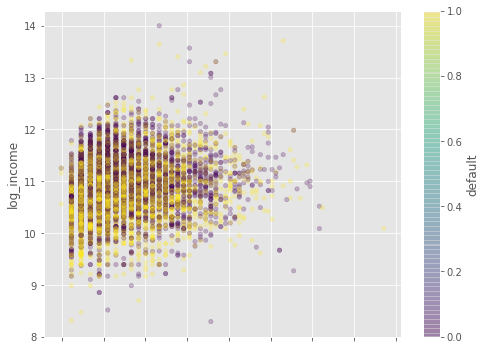

In [6]:
df.plot.scatter(x='log_age', y='log_income', c='default', alpha=0.25, cmap='viridis')

** Model - Build a tree classifier **

In [7]:
X = df.loc[:,('log_age', 'log_income')]
y = df.loc[:,'default']
clf = tree.DecisionTreeClassifier(max_depth=6).fit(X,y)
joblib.dump(clf, "simple.pkl")

['simple.pkl']

** Build - An ML API **

In [8]:
%%file simple.py
import numpy as np
from sklearn.externals import joblib
simple_model = joblib.load("simple.pkl")

def predict(age, amount):
    log_age = np.log(age)
    log_amount = np.log(amount)
    features = [age, amount]
    prob = model.predict_proba([features])[0]
    return prob

Overwriting simple.py


** Deploy - the ML API **

In [17]:
%%script --bg bash 
firefly simple.predict

Starting job # 2 in a separate thread.


** Interact - predict default probability **

In [24]:
simple_api = Client("http://127.0.0.1:8000")
simple_api.predict(age=35, amount=10000)

FireflyError: Internal Server Error

In [ ]:
#Frame: Find the probability of loan default
#Acquire the historical data
df = pd.read_csv("../data/historical_loan.csv") 
#Refine the data - drop NAs
df.dropna(axis=0, inplace=True) 
#Transform age 
df['logAge'] = np.log(df.age)
df['logIncome'] = np.log(df.income)
#Explore the data - two variables
df.plot.scatter(x='logAge', y='logIncome', c='default', alpha=0.25, cmap='viridis')

We need to serialize the model and the label encoders. 

In [ ]:
from sklearn.externals import joblib

In [ ]:
joblib.dump(final_model, "model.pkl")
joblib.dump(le_grade, "le_grade.pkl")
joblib.dump(le_ownership, "le_ownership.pkl");